<a href="https://colab.research.google.com/github/freyaldi/learn-machine-learning-development/blob/main/natural-language-processing/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# install kaggle and upload kaggle json to download dataset
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ferzareyaldi","key":"e51e2f00de3943063b2c338476100b4a"}'}

In [12]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d marklvl/sentiment-labelled-sentences-data-set
! unzip sentiment-labelled-sentences-data-set.zip

100% 326k/326k [00:00<00:00, 689kB/s]
100% 326k/326k [00:00<00:00, 688kB/s]
Archive:  sentiment-labelled-sentences-data-set.zip
  inflating: sentiment labelled sentences/amazon_cells_labelled.csv  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.csv  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.csv  
  inflating: sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.csv  
  inflating: sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/readme.txt  
  inflating: sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.csv 

In [15]:
import pandas as pd
df = pd.read_csv('sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', names=['sentence', 'label'], sep='\t')

In [16]:
df.head()

,sentence,label
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [17]:
from sklearn.model_selection import train_test_split
sentences = df['sentence'].values
y = df['label'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2)

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(sentences_train)
tokenizer.fit_on_texts(sentences_test)

seq_train = tokenizer.texts_to_sequences(sentences_train)
seq_test = tokenizer.texts_to_sequences(sentences_test)

padded_train = pad_sequences(seq_train, maxlen=20)
padded_test = pad_sequences(seq_test, maxlen=20)

In [19]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
num_epochs = 30
history = model.fit(padded_train, y_train, epochs=num_epochs,
                    validation_data=(padded_test, y_test), verbose=2)

Epoch 1/30
25/25 - 2s - loss: 0.6923 - accuracy: 0.5238 - val_loss: 0.6920 - val_accuracy: 0.5350 - 2s/epoch - 63ms/step
Epoch 2/30
25/25 - 0s - loss: 0.6897 - accuracy: 0.5612 - val_loss: 0.6896 - val_accuracy: 0.5600 - 125ms/epoch - 5ms/step
Epoch 3/30
25/25 - 0s - loss: 0.6856 - accuracy: 0.5775 - val_loss: 0.6855 - val_accuracy: 0.5700 - 108ms/epoch - 4ms/step
Epoch 4/30
25/25 - 0s - loss: 0.6789 - accuracy: 0.6100 - val_loss: 0.6802 - val_accuracy: 0.5850 - 104ms/epoch - 4ms/step
Epoch 5/30
25/25 - 0s - loss: 0.6696 - accuracy: 0.6075 - val_loss: 0.6714 - val_accuracy: 0.6250 - 116ms/epoch - 5ms/step
Epoch 6/30
25/25 - 0s - loss: 0.6548 - accuracy: 0.6850 - val_loss: 0.6597 - val_accuracy: 0.6650 - 127ms/epoch - 5ms/step
Epoch 7/30
25/25 - 0s - loss: 0.6347 - accuracy: 0.7013 - val_loss: 0.6439 - val_accuracy: 0.6850 - 100ms/epoch - 4ms/step
Epoch 8/30
25/25 - 0s - loss: 0.6066 - accuracy: 0.7613 - val_loss: 0.6245 - val_accuracy: 0.7200 - 104ms/epoch - 4ms/step
Epoch 9/30
25/25 -

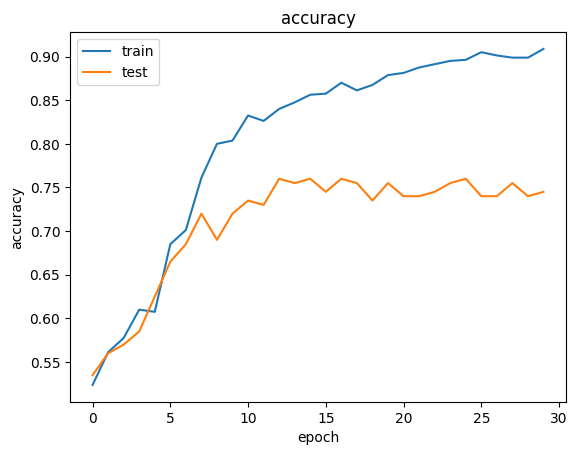

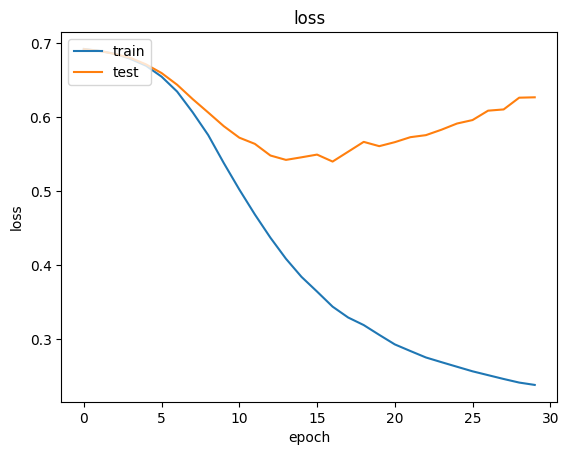

In [22]:
import matplotlib.pyplot as plt
def show_plot(train_plot, val_plot, title):
  plt.plot(train_plot)
  plt.plot(val_plot)
  plt.title(title)
  plt.ylabel(title)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()

show_plot(history.history['accuracy'], history.history['val_accuracy'], 'accuracy')
show_plot(history.history['loss'], history.history['val_loss'], 'loss')